In [79]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation
from sklearn.cross_validation import train_test_split

C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Software\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
cols = ['id','host_id','zipcode','property_type','room_type','accommodates','bedrooms','beds','bed_type','price','number_of_reviews','review_scores_rating',
    'host_listings_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

data= pd.read_csv('listings.csv',usecols=cols)

In [11]:
data.head()

,id,host_id,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,7087327,15830506,26,20003,House,Entire home/apt,4,1.0,1.0,2.0,Real Bed,$160.00,1,0,0,NaN
1,975833,5338703,1,20003,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,$350.00,2,12,65,94.0
2,8249488,1487418,2,20782,House,Private room,1,2.0,1.0,1.0,Real Bed,$50.00,2,0,1,NaN
3,8409022,16970249,1,20024,House,Private room,2,1.0,1.0,1.0,Real Bed,$95.00,1,30,0,NaN
4,8411173,30369828,1,20910,Townhouse,Entire home/apt,4,1.0,1.0,1.0,Real Bed,$50.00,7,16,0,NaN


In [24]:
# determine the number of missing entries in each column
for col in data.columns:
    
    print (col + ", Number of Missing Values:", len(data[col][data[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
host_listings_count, Number of Missing Values: 0
zipcode, Number of Missing Values: 9
property_type, Number of Missing Values: 1
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 27
bedrooms, Number of Missing Values: 21
beds, Number of Missing Values: 11
bed_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
availability_30, Number of Missing Values: 0
number_of_reviews, Number of Missing Values: 0
review_scores_rating, Number of Missing Values: 868


In [25]:
# remove NaN values from dataframe
original = len(data)
data = data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
print ("Number of NaN values removed:", original - len(data))

Number of NaN values removed: 62


In [26]:
# convert formatting for price
data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

# drop any inconsistent values
print ('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print ('Number of Beds 0:', len(data[data['beds'] == 0]))
print ('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

# convert ZipCode
data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '')

Number of Accommodates 0: 0
Number of Bedrooms 0: 391
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


In [27]:
data.head()

,id,host_id,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating
0,7087327,15830506,26,20003,House,Entire home/apt,4,1.0,1.0,2.0,Real Bed,160.0,1,0,0,NaN
1,975833,5338703,1,20003,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,350.0,2,12,65,94.0
2,8249488,1487418,2,20782,House,Private room,1,2.0,1.0,1.0,Real Bed,50.0,2,0,1,NaN
3,8409022,16970249,1,20024,House,Private room,2,1.0,1.0,1.0,Real Bed,95.0,1,30,0,NaN
4,8411173,30369828,1,20910,Townhouse,Entire home/apt,4,1.0,1.0,1.0,Real Bed,50.0,7,16,0,NaN


In [28]:
print ('Number of missing review scores ratings:', len(data['review_scores_rating'][data['review_scores_rating'].isnull()]))

Number of missing review scores ratings: 757


In [29]:
# explore distribution of accommodates
print ('Number of Unique Accomodation: ', np.unique(data['accommodates']))


Number of Unique Accomodation:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


In [30]:
for i in range(1, 17):
    print ('Accommodation {}:'.format(i), len(data[data['accommodates'] == i]))

Accommodation 1: 315
Accommodation 2: 1325
Accommodation 3: 387
Accommodation 4: 633
Accommodation 5: 154
Accommodation 6: 274
Accommodation 7: 35
Accommodation 8: 73
Accommodation 9: 16
Accommodation 10: 22
Accommodation 11: 7
Accommodation 12: 9
Accommodation 13: 2
Accommodation 14: 4
Accommodation 15: 6
Accommodation 16: 8


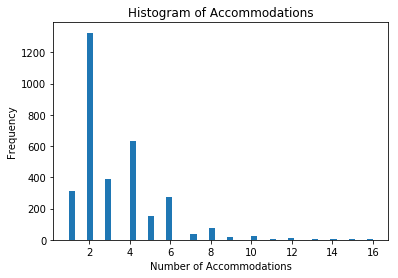

In [31]:
# visualize distribution of price (target variable)
plt.hist(data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

In [32]:
print ('Number of Unique Beds: ', np.unique(data['beds']))
for i in range(1, 17):
    print ('Beds {}:'.format(i), len(data[data['beds'] == i]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 16.]
Beds 1: 1961
Beds 2: 795
Beds 3: 292
Beds 4: 125
Beds 5: 46
Beds 6: 25
Beds 7: 9
Beds 8: 5
Beds 9: 3
Beds 10: 2
Beds 11: 1
Beds 12: 1
Beds 13: 2
Beds 14: 0
Beds 15: 0
Beds 16: 3


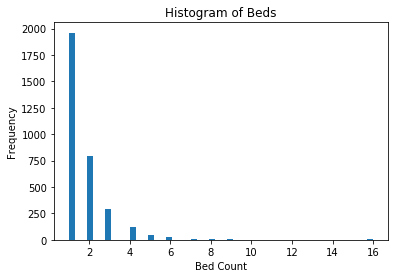

In [33]:
# visualize distribution of beds
plt.hist(data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

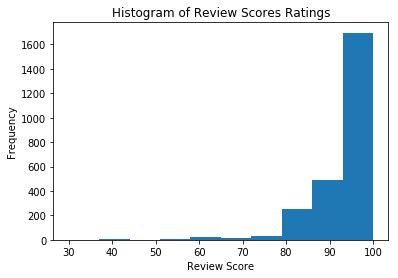

In [34]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()
#There are 757 listings with no review_scores_rating (NaN) values.
#We will handle this by turning the review_scores_ratings into a categorical predictor.
#Based on the histogram, we see that a vast majority of the listings seem to have overall favorable ratings; 
#i.e. skewed left distribution. We replace any NaN values that have no review with 'No Reviews' and we remove any remaining 
#inconsistent NaN values that have a number_of_reviews > 0. We will also convert the review_scores_ratings into buckets. 
#We will have the bucket ranges set more closely to a higher review score to accomodate for the skewed left distribution of 
#the review scores.

In [37]:
# turn NaN scores with 0 reviews into 'No Reviews'
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, ('review_scores_rating')] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace('NaN', 'No Reviews')

# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]

# ensure all zipcodes are of length 5
data = data[data['zipcode'].map(len) == 5]

In [39]:
len(data)

2513

In [40]:
# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'
    
data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print ('Unique Values in the Column:', np.unique(data['review_scores_rating']))

Unique Values in the Column: ['30-39' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94' '95-100']


In [41]:
print ('Number of remaining records:', len(data))

Number of remaining records: 2513


In [42]:
# encode categorical variables
zipcode_dummies = pd.get_dummies(data['zipcode'])
property_dummies = pd.get_dummies(data['property_type'])
room_dummies = pd.get_dummies(data['room_type'])
bed_dummies = pd.get_dummies(data['bed_type'])
ratings_scores_dummies = pd.get_dummies(data['review_scores_rating'])

In [43]:
# replace the old columns with our new one-hot encoded ones
df = pd.concat((data.drop(['zipcode', \
    'property_type', 'room_type', 'bed_type', 'review_scores_rating'], axis=1), \
    zipcode_dummies.astype(int), property_dummies.astype(int), \
    room_dummies.astype(int), bed_dummies.astype(int), ratings_scores_dummies.astype(int)), \
    axis=1)

print ('Number of Columns:', len(df.columns))

# move target predictor 'price' to the end of the dataframe
cols = list(df.columns.values)
idx = cols.index('price')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
df = df[rearrange_cols]

Number of Columns: 69


In [45]:
# convert non-categorical variables to floats and standardize
def standardize_col(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listings_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = standardize_col(df[col])
    
df.head()

,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,30-39,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,price
1,975833,5338703,-0.179880,1.431123,3.098331,2.411792,1.174566,-0.053822,0.235794,1.380052,...,0,0,0,0,0,0,0,1,0,350.0
8,8298145,5159038,-0.060442,-0.641140,0.420546,-0.451143,-0.583959,-0.053822,1.552348,-0.575909,...,0,0,0,0,0,0,0,0,1,38.0
10,1745866,9188872,-0.179880,0.394991,0.420546,0.980325,0.295303,0.439808,-0.979487,-0.453661,...,0,0,0,0,0,0,1,0,0,97.0
11,7678268,21704152,-0.179880,-1.159205,-0.472049,-0.451143,-0.583959,0.192993,-0.979487,-0.575909,...,0,0,0,0,0,0,0,0,1,55.0
15,8479636,44659281,-0.179880,-0.641140,-0.472049,-0.451143,-0.583959,-0.300637,1.451075,-0.575909,...,0,0,0,0,0,1,0,0,0,52.0


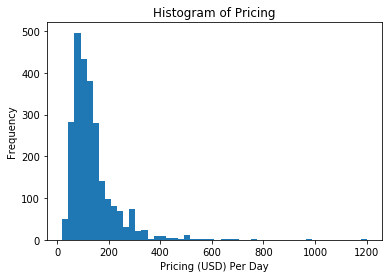

In [46]:
# visualize distribution of price (target variable)
plt.hist(df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()

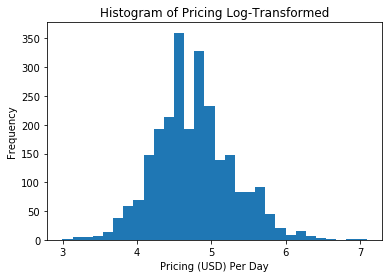

,id,host_id,host_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100,price,price_log
1,975833,5338703,-0.179880,1.431123,3.098331,2.411792,1.174566,-0.053822,0.235794,1.380052,...,0,0,0,0,0,0,1,0,350.0,5.857933
8,8298145,5159038,-0.060442,-0.641140,0.420546,-0.451143,-0.583959,-0.053822,1.552348,-0.575909,...,0,0,0,0,0,0,0,1,38.0,3.637586
10,1745866,9188872,-0.179880,0.394991,0.420546,0.980325,0.295303,0.439808,-0.979487,-0.453661,...,0,0,0,0,0,1,0,0,97.0,4.574711
11,7678268,21704152,-0.179880,-1.159205,-0.472049,-0.451143,-0.583959,0.192993,-0.979487,-0.575909,...,0,0,0,0,0,0,0,1,55.0,4.007333
15,8479636,44659281,-0.179880,-0.641140,-0.472049,-0.451143,-0.583959,-0.300637,1.451075,-0.575909,...,0,0,0,0,1,0,0,0,52.0,3.951244


In [61]:
# log transform the response 'price'
df['price_log'] = df['price'].apply(lambda x: math.log(x))

# visualize distribution of price (target variable)
plt.hist(df['price_log'], bins=30)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()
df.head()

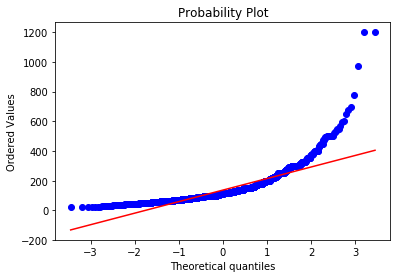

In [48]:
# qq plot for log-transformed pricing
stats.probplot(df['price'], dist="norm", plot=pylab)
pylab.show()

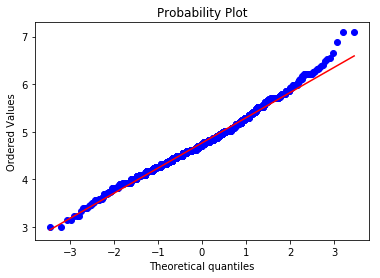

In [66]:
# qq plot for log-transformed pricing
stats.probplot(df['price_log'], dist="norm", plot=pylab)
pylab.show()

In [67]:
'''We see that after transformation, the distribution for price resembles that of a normal distribution.We see from the Q-Q plots that log-transforming the response variable yields a distribution that more closely resembles that of a normal distribution. This normality validation is important in order to fit the assumptions of linear regression models'''

'We see that after transformation, the distribution for price resembles that of a normal distribution.We see from the Q-Q plots that log-transforming the response variable yields a distribution that more closely resembles that of a normal distribution. This normality validation is important in order to fit the assumptions of linear regression models'

In [77]:
# read to csv
df.to_csv('listings_clean.csv', index=False)

C:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


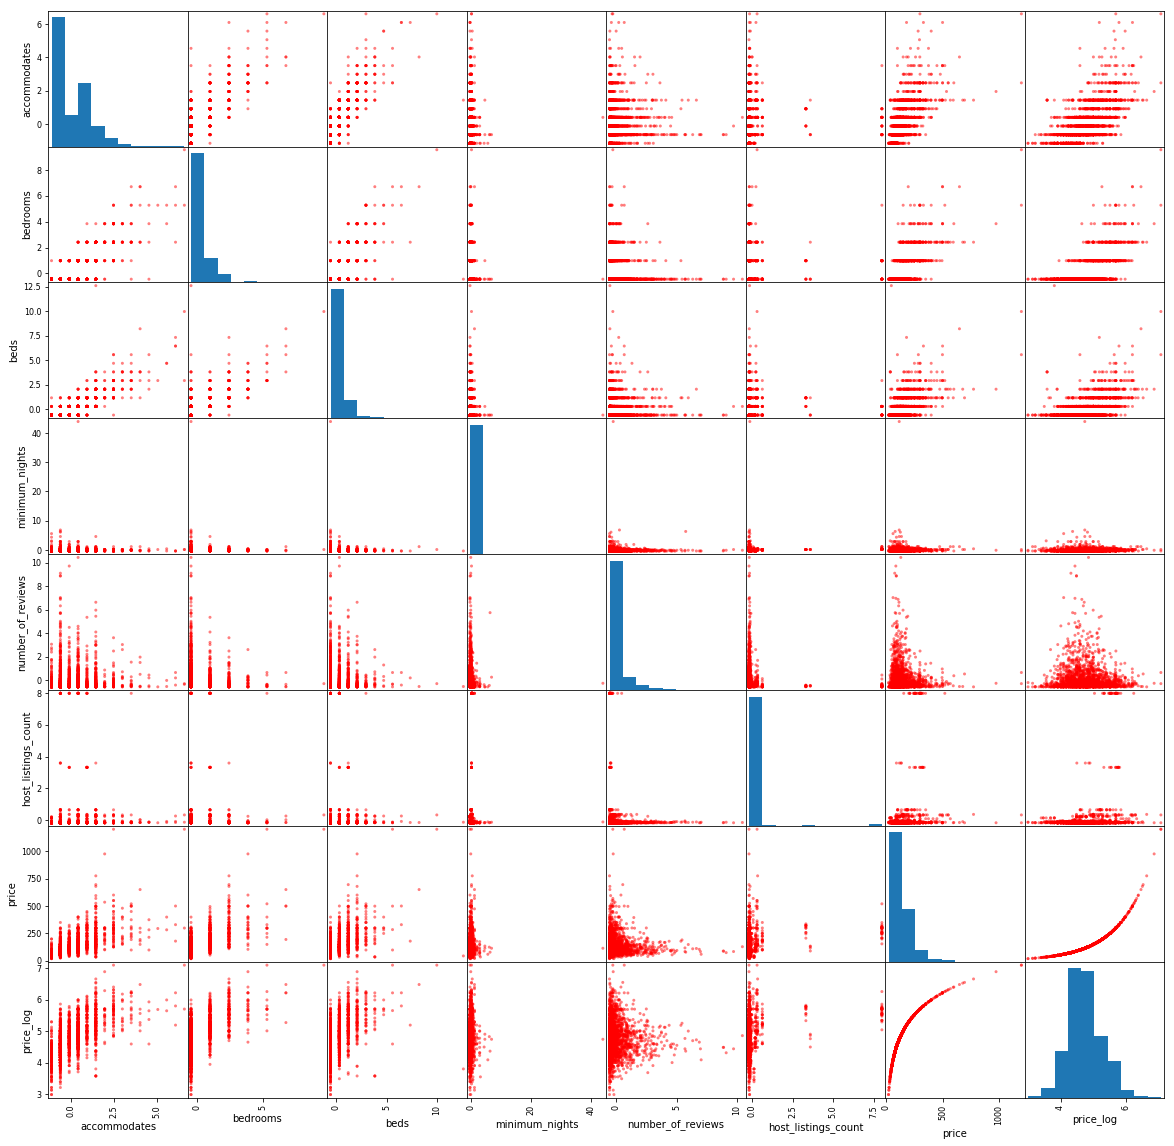

In [78]:
# check for collinearity and visualize relationship between each predictor and price
matrix_cols = ['accommodates', 'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews', 'host_listings_count', 'price','price_log']
axs = pd.scatter_matrix(df[matrix_cols], figsize=(20, 20), c='red')

In [91]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression(n_jobs=10)
len(df.columns)

70

In [92]:
#features
features = df.iloc[:,2:68]
print('Summary of feature sample')
features.head()

Summary of feature sample


,host_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,20001,20002,...,Real Bed,30-39,40-49,50-59,60-69,70-79,80-84,85-89,90-94,95-100
1,-0.179880,1.431123,3.098331,2.411792,1.174566,-0.053822,0.235794,1.380052,0,0,...,1,0,0,0,0,0,0,0,1,0
8,-0.060442,-0.641140,0.420546,-0.451143,-0.583959,-0.053822,1.552348,-0.575909,0,0,...,1,0,0,0,0,0,0,0,0,1
10,-0.179880,0.394991,0.420546,0.980325,0.295303,0.439808,-0.979487,-0.453661,0,0,...,1,0,0,0,0,0,0,1,0,0
11,-0.179880,-1.159205,-0.472049,-0.451143,-0.583959,0.192993,-0.979487,-0.575909,0,0,...,1,0,0,0,0,0,0,0,0,1
15,-0.179880,-0.641140,-0.472049,-0.451143,-0.583959,-0.300637,1.451075,-0.575909,0,0,...,1,0,0,0,0,0,1,0,0,0


In [103]:
#dependent variable
depVar = df['price_log']

In [104]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1780])
X_train.head()

#Establish the training set for the Y-variable or dependent variable (the number of rows much match the X-training set)

#Dependent Variable Training Set (y Training)
y_train = depVar[: 1780]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

#Establish the testing set for the X-Variables or Feature space

#Testing Set (X Testing)
X_test = features[-734:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

#Establish Ground truth 

#Ground Truth (y_test) 
y_test = depVar[-734:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 1780
The number of observations in the feature testing set is: 734
      host_listings_count  accommodates  bathrooms  bedrooms      beds  \
2612            -0.179880     -0.641140  -0.472049 -0.451143 -0.583959   
2614            -0.179880     -0.641140  -0.472049 -0.451143 -0.583959   
2616            -0.179880      0.913057  -0.472049  0.980325  0.295303   
2617            -0.128692      2.467254   0.420546  3.843260  2.053828   
2618            -0.128692      0.394991   0.420546 -0.451143  0.295303   

      minimum_nights  availability_30  number_of_reviews  20001  20002  \
2612        0.192993        -0.979487          -0.575909      1      0   
2614       -0.053822        -0.979487          -0.575909      1      0   
2616       -0.300637         1.957442          -0.423099      0      1   
2617       -0.053822        -0.473120          -0.239728      0      1   
2618       -0.053822        -0.574393          -0.545347      0 

2612    4.605170
2614    4.605170
2616    5.991465
2617    5.652489
2618    4.700480
Name: price_log, dtype: float64

In [105]:
#Random Forest

modelRF.fit(X_train,y_train)

#Support Vector Regression

modelSVR.fit(X_train,y_train)

#Linear Regression

modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [106]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(modelRF, X_train, y_train))

[0.65466431 0.58140019 0.52818206]


In [107]:
print(cross_val_score(modelLR, X_train, y_train)) 

[ 6.86724734e-01 -6.84175059e+19 -3.20020813e+19]


R Squared: 0.584
RMSE: 0.313


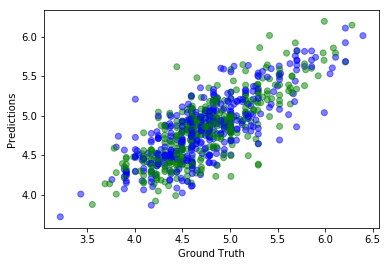

In [108]:
predictions = modelRF.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

In [109]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(algorithm='brute')

In [110]:
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

R Squared: 0.550
RMSE: 0.326


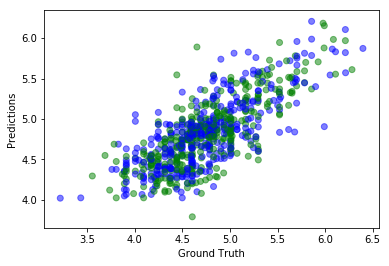

In [111]:
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

R Squared: 0.643
RMSE: 0.290


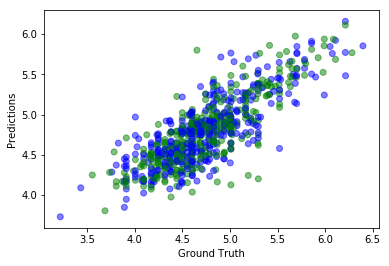

In [113]:
predictions = modelSVR.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)
#Make Predictions
predictions = modelSVR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

R Squared: 0.557
RMSE: 0.323


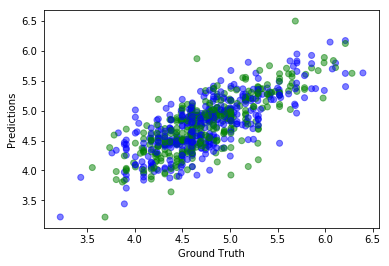

In [114]:
predictions = modelLR.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)
#Make Predictions
predictions = modelLR.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()